In [128]:
import os
import csv
import operator
import itertools
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
import numpy as np
%matplotlib inline

In [687]:
# df = pd.read_csv('./pedigreeResultsHybrid.csv')
df = pd.read_csv('./pedigreeResultsNew.csv')

In [688]:
df = df.loc[~df['PedigreeId'].str.contains('test')]
df = df.loc[df['Correct_IP'] != 'M']

TypeError: bad operand type for unary ~: 'float'

In [689]:
ipMapper = {'ansXLR':'XL','ansAR':'AR','ansAD':'AD'}
withContradiction = []
withoutContradiction = []
correct = df['Correct_IP'].tolist()
for i,row in df.iterrows():
    results = row[['ansXLR','ansAR','ansAD']]
    contradictions = [1 if x=='yes' else 0 for x in row[['contradictionXLR','contradictionAR','contradictionAD']].tolist()]
    goodIndices = [i for i in range(3) if not contradictions[i]]
    withContradiction.append(ipMapper[np.argmax(results[goodIndices])])
    withoutContradiction.append(ipMapper[np.argmax(results)])

KeyError: nan

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(correct,withContradiction,labels=['XL','AR','AD'])

In [ ]:
plot_confusion_matrix(cm,['XL','AR','AD'],normalize=True)

In [ ]:
df = df.rename(columns={'contradictionXLR':'contraXLR','contradictionAR':'contraAR','contradictionAD':'contraAD'})

In [ ]:
# correct for each category
# wrong for each category
xlRows = df.loc[df['Correct_IP'] == 'XL'][['PedigreeId','contraXLR','ansXLR','contraAR','ansAR']]
arRows = df.loc[df['Correct_IP'] == 'AR'][['PedigreeId','contraXLR','ansXLR','contraAR','ansAR']]
adRows = df.loc[df['Correct_IP'] == 'AD'][['PedigreeId','contraAR','ansAR','contraAD','ansAD']]

In [ ]:
correctIndices = xlRows[xlRows['ansXLR'] > xlRows['ansAR']].index
xlRows['ye'] = [1 if x in correctIndices and y != 'yes' else '_' for x,y in zip(xlRows.index,xlRows.contraXLR)]
xlRows['XLR>AR'] = [1 if x in correctIndices else '_' for x in xlRows.index]
xlRows['diff'] = abs(xlRows['ansXLR']-xlRows['ansAR'])/xlRows['ansXLR']
print(xlRows[['PedigreeId','contraXLR','ansXLR','contraAR','ansAR','ye','XLR>AR']])

In [ ]:
correctIndices = arRows[arRows['ansAR'] > arRows['ansXLR']].index
arRows['ye'] = [1 if x in correctIndices and y != 'yes' else '_' for x,y in zip(arRows.index,arRows.contraAR)]
arRows['AR>XLR'] = [1 if x in correctIndices else '_' for x in arRows.index]
arRows['diff'] = abs(arRows['ansAR']-arRows['ansXLR'])/arRows['ansAR']
print(arRows[['PedigreeId','contraXLR','ansXLR','contraAR','ansAR','ye','AR>XLR']])

In [ ]:
correctIndices = adRows[adRows['ansAD'] > adRows['ansAR']].index
adRows['ye'] = [1 if x in correctIndices and y != 'yes' else '_' for x,y in zip(adRows.index,adRows.contraAD)]
adRows['AD>AR'] = [1 if x in correctIndices else '_' for x in adRows.index]
adRows['diff'] = abs(adRows['ansAD']-adRows['ansAR'])/adRows['ansAD']
print(adRows[['PedigreeId','contraAR','ansAR','contraAD','ansAD','ye','AD>AR']])

In [ ]:
df2 = pd.read_csv('/Users/Eddie/kec-bot/PatientRecords.csv')

In [690]:
df = df.rename(columns={'PedigreeId': 'Patient ID'})

In [691]:
newDf = pd.merge(df, df2, how='inner', on=['Patient ID'])

In [692]:
data = newDf[['Patient ID','Correct_IP','contraXLR','ansXLR','contraAR','ansAR','contraAD','ansAD','Affected Family Members','More Than One Affected Generation','Affected Male with Affected Son','Affected Male with Affected Daughter','Skipping of Females Only','Only Siblings Affected','Males and Females Affected','Any Male with Age of Onset <= 20 Years','Any Female with Asymmetric Diease','Any Female with Less Severe/Asymmetric/Later Onset','Incomplete Penetrance','Consanguinity']]

KeyError: "['contraXLR' 'contraAR' 'contraAD'] not in index"

In [ ]:
yMapper = {'AD':0,'AR':1,'XL':2}
y = np.array([yMapper[x] for x in data['Correct_IP']])

In [ ]:
yesNo = {'yes':1,'no':0,'Yes':1,'No':0}
x = []
for i,row in data.iterrows():
    currentRow = [yesNo[_x] if _x=='yes' or _x=='no' or _x=='Yes' or _x=='No' else _x for _x in row.tolist()[2:]]
    x.append(currentRow)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import *
classifier = ExtraTreesClassifier

In [ ]:
clf = classifier(n_estimators=500)
clf = clf.fit(X_train, y_train)

In [ ]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.score(x,y))

In [ ]:
predY = clf.predict(x)
cm2 = confusion_matrix(y,predY,labels=[0,1,2])
plot_confusion_matrix(cm2,[0,1,2],normalize=True)

Normalized confusion matrix
[[ 0.71428571  0.28571429  0.        ]
 [ 0.11111111  0.88888889  0.        ]
 [ 0.5         0.          0.5       ]]


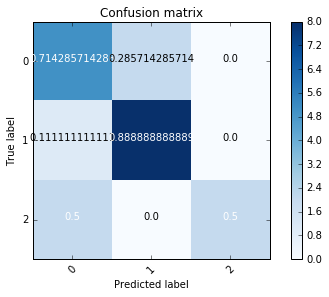

In [693]:
predY = clf.predict(X_test)
cm2 = confusion_matrix(y_test,predY,labels=[0,1,2])
plot_confusion_matrix(cm2,[0,1,2],normalize=True)

In [759]:
dfBF = pd.read_csv('./pedigreeResultsBruteForce2.csv')
dfBF = dfBF.loc[dfBF['Correct_IP'] != 'M']

In [760]:
dfBF['ResultsXLR'] = dfBF['ResultsXLR'].apply(lambda x:max(eval(x)[2:]))
dfBF['ResultsXLD'] = dfBF['ResultsXLD'].apply(lambda x:max(eval(x)[2:]))
dfBF['ResultsAR'] = dfBF['ResultsAR'].apply(lambda x:max(eval(x)[2:]))
dfBF['ResultsAD'] = dfBF['ResultsAD'].apply(lambda x:max(eval(x)[2:]))

In [761]:
trueLabels = dfBF['Correct_IP'].apply(lambda x:yMapper[x])

In [764]:
yMapper2 = {'ResultsAD':0,'ResultsAR':1,'ResultsXLR':2,'ResultsXLD':2}
predicted = dfBF[['ResultsXLR','ResultsAR','ResultsAD']].idxmax(axis=1).apply(lambda x:yMapper2[x])
# predicted = dfBF[['ResultsXLR','ResultsXLD','ResultsAR','ResultsAD']].idxmax(axis=1).apply(lambda x:yMapper2[x])

Accuracy: 0.650485436893

Normalized confusion matrix
[[ 0.64864865  0.2972973   0.05405405]
 [ 0.11111111  0.71111111  0.17777778]
 [ 0.38095238  0.0952381   0.52380952]]


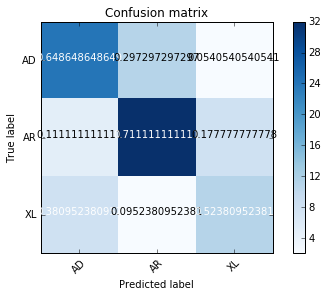

In [765]:
mapBack = {0:'AD',1:'AR',2:'XL'}
print('Accuracy: '+str(len([x for x,y in zip(trueLabels,predicted) if x==y])/float(len(trueLabels)))+'\n')
cm3 = confusion_matrix(trueLabels.apply(lambda x:mapBack[x]),predicted.apply(lambda x:mapBack[x]),labels=['AD','AR','XL'])
plot_confusion_matrix(cm3,['AD','AR','XL'],normalize=True)

In [699]:
yMapper3 = {'ResultsAD':'AD','ResultsAR':'AR','ResultsXLR':'XL'}
dfBF['Predicted'] = dfBF[['ResultsXLR','ResultsAR','ResultsAD']].idxmax(axis=1).apply(lambda x:yMapper3[x])

In [700]:
dfBF = dfBF.rename(columns={'PedigreeId': 'Patient ID'})

In [701]:
newDf['bfXLR'] = dfBF['ResultsXLR']
newDf['bfAR'] = dfBF['ResultsAR']
newDf['bfAD'] = dfBF['ResultsAD']

In [702]:
newerDf = pd.merge(newDf, dfBF, how='inner', on=['Patient ID'])
newerDf = newerDf.rename(columns={'Correct_IP_x': 'Correct_IP'})
del newerDf['Correct_IP_y']
del newerDf['Predicted']

In [703]:
# data = newerDf[['Patient ID','Correct_IP','ResultsXLR','ResultsAR','ResultsAD','Affected Family Members','More Than One Affected Generation','Affected Male with Affected Son','Affected Male with Affected Daughter','Skipping of Females Only','Only Siblings Affected','Males and Females Affected','Any Male with Age of Onset <= 20 Years','Any Female with Asymmetric Diease','Any Female with Less Severe/Asymmetric/Later Onset','Incomplete Penetrance','Consanguinity']]
data = newerDf[['Patient ID','Correct_IP','contraXLR','ansXLR','contraAR','ansAR','contraAD','ansAD','Affected Family Members','More Than One Affected Generation','Affected Male with Affected Son','Affected Male with Affected Daughter','Skipping of Females Only','Only Siblings Affected','Males and Females Affected','Any Male with Age of Onset <= 20 Years','Any Female with Asymmetric Diease','Any Female with Less Severe/Asymmetric/Later Onset','Incomplete Penetrance','Consanguinity']]
yMapper = {'AD':0,'AR':1,'XL':2}
y = np.array([yMapper[x] for x in data['Correct_IP']])
yesNo = {'yes':1,'no':0,'Yes':1,'No':0}
x = []
for i,row in data.iterrows():
    currentRow = [yesNo[_x] if _x=='yes' or _x=='no' or _x=='Yes' or _x=='No' else _x for _x in row.tolist()[2:]]
    x.append(currentRow)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

KeyError: "['contraXLR' 'contraAR' 'contraAD'] not in index"

In [ ]:
classifier = ExtraTreesClassifier
clf = classifier(n_estimators=500,max_features='sqrt',max_depth=None,criterion='gini')
clf = clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.score(x,y))

In [ ]:
predY = clf.predict(X_test)
cm2 = confusion_matrix(y_test,predY,labels=[0,1,2])
plot_confusion_matrix(cm2,[0,1,2],normalize=True)